## Problem statement
##### Use decision trees to prepare a model on fraud data by treating those who have taxable_income <= 30000 as "Risky" and others are "Good"
### Importing the libraries


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report,accuracy_score
from sklearn import preprocessing
import seaborn as sn


### Loading the dataset

In [2]:
fraud = pd.read_csv("Fraud_check.csv")
fraud.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


##### We can just peek into few data points by using head function of pandas. By default, head function return top 5 values

### Data Insights

In [3]:
fraud.shape

(600, 6)

In [4]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


##### We could see there are no null values in our dataset.
Data Description : Undergrad : person is under graduated or not Marital.Status : marital status of a person Taxable.Income : Taxable income is the amount of how much tax an individual owes to the government Work Experience : Work experience of an individual person Urban : Whether that person belongs to urban area or not

In [5]:
dups = fraud.duplicated()
print('Number of duplicate rows: %d' % dups.sum())

Number of duplicate rows: 0


##### There are no duplicate values in our dataset
### Summary statistics

In [6]:
fraud.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


### Data visualization
##### We will use boxplots and histograms for checking outlier data and understanding the data distribution of the features in our dataset


C:\Users\Vishal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='City.Population'>

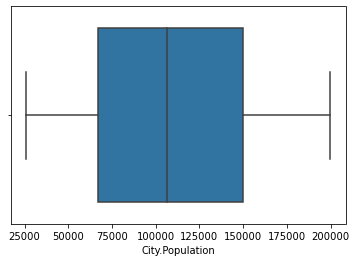

In [7]:
sn.boxplot(fraud['City.Population'])

C:\Users\Vishal\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='City.Population'>

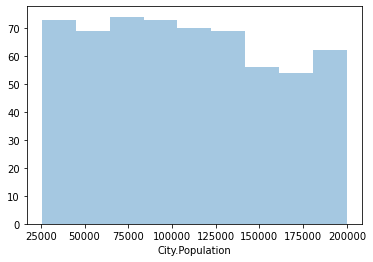

In [8]:
sn.distplot(fraud['City.Population'],kde=False)

C:\Users\Vishal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Work.Experience'>

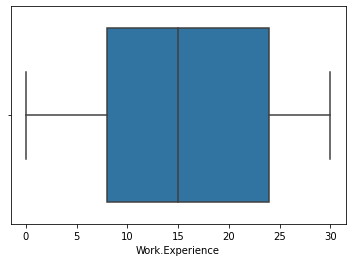

In [9]:
sn.boxplot(fraud['Work.Experience'])

C:\Users\Vishal\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Work.Experience'>

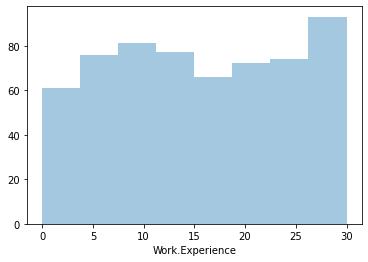

In [10]:
sn.distplot(fraud['Work.Experience'],kde=False)

C:\Users\Vishal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Taxable.Income'>

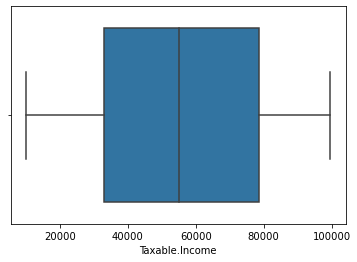

In [11]:
sn.boxplot(fraud['Taxable.Income'])

C:\Users\Vishal\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Taxable.Income'>

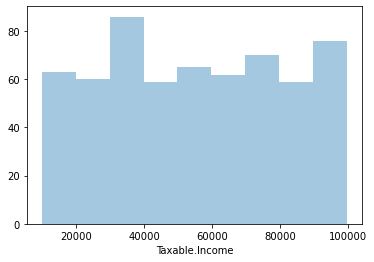

In [12]:
sn.distplot(fraud['Taxable.Income'],kde=False)

### Understanding the target variable
##### Our main objective is to to prepare a model on fraud data by treating those who have taxable_income <= 30000 as "Risky" and others are "Good". So Taxable.Income is our target variable. As Taxable.Income is an int datatype in our dataset, we need to convert it into categorical for our problem statement.

In [13]:
fraud[fraud['Taxable.Income']<=30000].value_counts()

Undergrad  Marital.Status  Taxable.Income  City.Population  Work.Experience  Urban
YES        Single          27394           132859           18               YES      1
NO         Single          20109           39360            10               NO       1
           Married         24370           81593            14               YES      1
                           25062           114823           11               NO       1
                           27143           128996           3                YES      1
                                                                                     ..
YES        Married         19060           145744           9                YES      1
                           20391           86648            16               YES      1
                           20719           103614           24               NO       1
                           21016           140762           26               NO       1
NO         Divorced        10329     

In [14]:
fraud[fraud['Taxable.Income']>30000].value_counts()

Undergrad  Marital.Status  Taxable.Income  City.Population  Work.Experience  Urban
YES        Single          99619           86896            29               NO       1
NO         Single          35922           77719            28               NO       1
           Married         98334           74052            30               NO       1
                           98416           31156            13               YES      1
           Single          31629           53848            10               NO       1
                                                                                     ..
YES        Married         39114           125987           3                YES      1
                           39444           148821           6                NO       1
                           39476           57194            25               NO       1
                           39818           148068           13               NO       1
NO         Divorced        31409     

##### We could see that there are 124 observations with taxable income less than 30,000 and 476 observations with income more than 30000

In [15]:
fraud['Taxable.Income'].max()

99619

In [16]:
fraud['Taxable.Income'].min()

10003

##### The maximum value is 99619 and minimum value is 10003. We will use cut function of pandas to create bins and divide the taxable_income into 2 categories (<=30000 and >30000)

In [17]:
fraud["Taxable.Income"] = pd.cut(fraud["Taxable.Income"], bins = [10002,30000,99620], labels = ["Risky", "Good"])

In [18]:
fraud.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,Good,50047,10,YES
1,YES,Divorced,Good,134075,18,YES
2,NO,Married,Good,160205,30,YES
3,YES,Single,Good,193264,15,YES
4,NO,Married,Good,27533,28,NO


In [19]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Undergrad        600 non-null    object  
 1   Marital.Status   600 non-null    object  
 2   Taxable.Income   600 non-null    category
 3   City.Population  600 non-null    int64   
 4   Work.Experience  600 non-null    int64   
 5   Urban            600 non-null    object  
dtypes: category(1), int64(2), object(3)
memory usage: 24.2+ KB


### Using encoding techniques to convert the categorical variables to numeric

In [20]:
def DataFrameImputer(data):
    for col in data.columns:
        if data[col].dtype=='O':
            print(data[col])

DataFrameImputer(fraud)

0       NO
1      YES
2       NO
3      YES
4       NO
      ... 
595    YES
596    YES
597     NO
598    YES
599     NO
Name: Undergrad, Length: 600, dtype: object
0        Single
1      Divorced
2       Married
3        Single
4       Married
         ...   
595    Divorced
596    Divorced
597    Divorced
598     Married
599    Divorced
Name: Marital.Status, Length: 600, dtype: object
0      YES
1      YES
2      YES
3      YES
4       NO
      ... 
595    YES
596    YES
597    YES
598     NO
599     NO
Name: Urban, Length: 600, dtype: object


##### We have 3 columns which are categorical and also our Target variable Taxable.Income is categorical.


In [21]:
fraud['Undergrad'].value_counts()

YES    312
NO     288
Name: Undergrad, dtype: int64

In [22]:
fraud['Marital.Status'].value_counts()

Single      217
Married     194
Divorced    189
Name: Marital.Status, dtype: int64

In [23]:
fraud['Urban'].value_counts()

YES    302
NO     298
Name: Urban, dtype: int64

In [24]:
fraud['Taxable.Income'].value_counts()

Good     476
Risky    124
Name: Taxable.Income, dtype: int64

##### We will use Label encoding technique for ordinal data and one hot encoding technique for nomimal data. The Taxable.Income our target variable is a ordinal data (Good, RIsky) and the other independent features are nominal


In [25]:
fraud=pd.get_dummies(fraud,columns=['Undergrad','Marital.Status','Urban'], drop_first=True)

In [26]:
label_encoder = preprocessing.LabelEncoder() 
 
fraud['Taxable.Income']= label_encoder.fit_transform(fraud['Taxable.Income']) 
fraud.head()

,Taxable.Income,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES
0,0,50047,10,0,0,1,1
1,0,134075,18,1,0,0,1
2,0,160205,30,0,1,0,1
3,0,193264,15,1,0,1,1
4,0,27533,28,0,1,0,0


<AxesSubplot:xlabel='Taxable.Income', ylabel='count'>

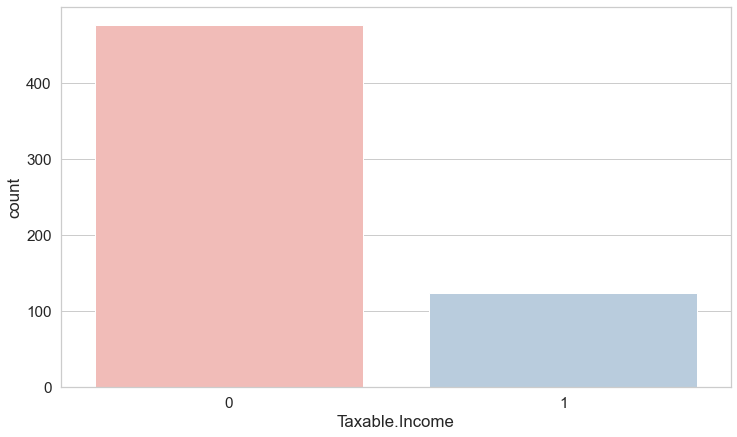

In [27]:
sn.set(style = 'whitegrid', font_scale = 1.4)
plt.subplots(figsize = (12,7))
sn.countplot(x = 'Taxable.Income', data = fraud, palette = 'Pastel1')

##### We can see the value counts of all the Taxable Incomes. We have more number of perople with Taxable Incomes >30,000. The data is imbalanced. The sets of data in which classes are not evenly distributed are called imbalanced datasets.The imbalance dataset can cause high/low accuracy value of the model due to a certain class.
### Separating feature data and Label data and train-test split


In [28]:
X = fraud.drop('Taxable.Income',axis=1)
X

,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES
0,50047,10,0,0,1,1
1,134075,18,1,0,0,1
2,160205,30,0,1,0,1
3,193264,15,1,0,1,1
4,27533,28,0,1,0,0
...,...,...,...,...,...,...
595,39492,7,1,0,0,1
596,55369,2,1,0,0,1
597,154058,0,0,0,0,1
598,180083,17,1,1,0,0


In [29]:
Y = fraud['Taxable.Income']
Y

0      0
1      0
2      0
3      0
4      0
      ..
595    0
596    0
597    0
598    0
599    0
Name: Taxable.Income, Length: 600, dtype: int32

In [30]:
X_train, X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.2,random_state=30)

In [31]:
X_train.shape

(480, 6)

In [32]:
Y_train.shape

(480,)

In [33]:
X_test.shape

(120, 6)

In [34]:
Y_test.shape

(120,)

### Building Decision Tree classifier using Entropy criteria

In [35]:
model_en_dt = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model_en_dt.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

### Predicting on train data set


In [36]:
preds_train_dt_en = model_en_dt.predict(X_train) 
pd.Series(preds_train_dt_en).value_counts()

0    479
1      1
dtype: int64

In [37]:
pd.crosstab(Y_train,preds_train_dt_en)

col_0,0,1
Taxable.Income,,
0,384,0
1,95,1


### Predicting on test data set


In [38]:
preds_test_dt_en  = model_en_dt.predict(X_test) 
pd.Series(preds_test_dt_en).value_counts()

0    119
1      1
dtype: int64

In [39]:
pd.crosstab(Y_test,preds_test_dt_en)

col_0,0,1
Taxable.Income,,
0,91,1
1,28,0


### Checking test accuracy


In [40]:
accuracy = accuracy_score(Y_test,preds_test_dt_en)
print(accuracy)

0.7583333333333333


### Checking train accuracy


In [41]:
accuracy = accuracy_score(Y_train,preds_train_dt_en)
print(accuracy)

0.8020833333333334


##### If we compare the train and test accuracy, we don't have much difference so there is no overfitting problem in our model

In [42]:
print(classification_report(Y_test,preds_test_dt_en))

              precision    recall  f1-score   support

           0       0.76      0.99      0.86        92
           1       0.00      0.00      0.00        28

    accuracy                           0.76       120
   macro avg       0.38      0.49      0.43       120
weighted avg       0.59      0.76      0.66       120



##### From the above confusion matrix, we can see that the model is biased and predicting Taxable.Income as Good correctly but it is not able to predict Risky (<=30000). We will balance our data using oversampling and then build our model
### Using Over Sampling for balancing the data


In [43]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(sampling_strategy = 'not majority', random_state = 42)

In [44]:
x_resample, y_resample = sm.fit_resample(X, Y)
y_df = pd.DataFrame(y_resample)

In [45]:
y_df.value_counts()

Taxable.Income
1                 476
0                 476
dtype: int64

##### We could see the data is resampled now and count of both Good and Risky values are 476 now. We will split the resampled data into training and test data and build a Decision Tree model

In [46]:
x_resample

,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES
0,50047,10,0,0,1,1
1,134075,18,1,0,0,1
2,160205,30,0,1,0,1
3,193264,15,1,0,1,1
4,27533,28,0,1,0,0
...,...,...,...,...,...,...
947,131067,16,0,0,0,1
948,102459,18,0,0,1,0
949,124986,18,0,0,1,1
950,91873,15,0,0,0,0


In [47]:
y_resample

0      0
1      0
2      0
3      0
4      0
      ..
947    1
948    1
949    1
950    1
951    1
Name: Taxable.Income, Length: 952, dtype: int32

In [48]:
X_train, X_test,Y_train,Y_test = train_test_split(x_resample,y_resample, test_size=0.2,random_state=30)

##### We will apply Normalization to make the scale free and to make data consistent

In [49]:
from sklearn.preprocessing import MinMaxScaler

# fit scaler on training data
norm = MinMaxScaler().fit(X_train)

# transform training data
X_train_norm = norm.transform(X_train)

# transform testing dataabs
X_test_norm = norm.transform(X_test)

In [50]:
X_train_norm

array([[0.28936373, 0.1       , 0.        , 0.        , 1.        ,
        0.        ],
       [0.59417008, 0.36666667, 1.        , 1.        , 0.        ,
        0.        ],
       [0.11766734, 0.63333333, 0.        , 1.        , 0.        ,
        0.        ],
       ...,
       [0.64855545, 0.23333333, 0.        , 0.        , 0.        ,
        0.        ],
       [0.62877373, 0.43333333, 1.        , 0.        , 1.        ,
        0.        ],
       [0.29401893, 0.46666667, 1.        , 0.        , 0.        ,
        1.        ]])

In [51]:
print(X_train_norm.shape)

(761, 6)


In [52]:
X_test_norm

array([[0.28627176, 0.46666667, 1.        , 0.        , 0.        ,
        1.        ],
       [0.92015471, 0.13333333, 1.        , 0.        , 0.        ,
        0.        ],
       [0.06473026, 0.56666667, 0.        , 0.        , 0.        ,
        0.        ],
       ...,
       [0.92218921, 0.83333333, 1.        , 0.        , 1.        ,
        1.        ],
       [0.64277956, 0.06666667, 0.        , 0.        , 1.        ,
        1.        ],
       [0.17205846, 0.83333333, 0.        , 1.        , 0.        ,
        1.        ]])

In [53]:
print(X_test_norm.shape)

(191, 6)


In [54]:
Y_train

803    1
76     0
411    0
618    1
237    1
      ..
500    0
813    1
941    1
421    0
805    1
Name: Taxable.Income, Length: 761, dtype: int32

In [55]:
Y_test

745    1
704    1
749    1
521    0
310    0
      ..
61     1
644    1
209    0
585    0
224    0
Name: Taxable.Income, Length: 191, dtype: int32

### Building Decision tree classifier on Balanced data

In [56]:
model_dt = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model_dt.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

### Predicting on train data set

In [57]:
preds_train_dt = model_dt.predict(X_train_norm) 
pd.Series(preds_train_dt).value_counts()

C:\Users\Vishal\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


1    432
0    329
dtype: int64

In [58]:
pd.crosstab(Y_train,preds_train_dt)

col_0,0,1
Taxable.Income,,
0,229,149
1,100,283


### Predicting on test data set

In [59]:
preds_test_dt  = model_dt.predict(X_test_norm) 
pd.Series(preds_test_dt).value_counts()

C:\Users\Vishal\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


1    100
0     91
dtype: int64

In [60]:
pd.crosstab(Y_test,preds_test_dt)

col_0,0,1
Taxable.Income,,
0,60,38
1,31,62


### Checking test accuracy

In [61]:
accuracy = accuracy_score(Y_test,preds_test_dt)
print(accuracy)

0.6387434554973822


### Checking train accuracy

In [62]:
accuracy = accuracy_score(Y_train,preds_train_dt)
print(accuracy)

0.6727989487516426


In [63]:
print(classification_report(Y_test,preds_test_dt))

              precision    recall  f1-score   support

           0       0.66      0.61      0.63        98
           1       0.62      0.67      0.64        93

    accuracy                           0.64       191
   macro avg       0.64      0.64      0.64       191
weighted avg       0.64      0.64      0.64       191



##### After balancing the data with oversampling, we can see that the accuracy of the model is reduced, but the precision,recall and f1-scores are much better than earlier.
##### As we have very less features,we need more features for better prediction and accuracy

## Using Random Forest classifier

In [64]:
from sklearn.ensemble import RandomForestClassifier
forest_new = RandomForestClassifier(n_estimators=140,max_depth=5,min_samples_split=20,criterion='gini')  # n_estimators is the number of decision trees
forest_new.fit(X_train_norm, Y_train)

RandomForestClassifier(max_depth=5, min_samples_split=20, n_estimators=140)

### Predicting on train data set

In [65]:
pred_rf_train = forest_new.predict(X_train_norm) # predicting on train data set 
pd.Series(pred_rf_train).value_counts()

1    389
0    372
dtype: int64

In [66]:
pd.crosstab(Y_train,pred_rf_train)

col_0,0,1
Taxable.Income,,
0,275,103
1,97,286


### Predicting on test data set

In [67]:
pred_rf_test  = forest_new.predict(X_test_norm) 
pd.Series(pred_rf_test).value_counts()

0    102
1     89
dtype: int64

In [68]:
pd.crosstab(Y_test,pred_rf_test)

col_0,0,1
Taxable.Income,,
0,67,31
1,35,58


### Checking test accuracy


In [69]:
accuracy = accuracy_score(Y_test,pred_rf_test)
print(accuracy)

0.6544502617801047


### Checking train accuracy


In [70]:
accuracy = accuracy_score(Y_train,pred_rf_train)
print(accuracy)

0.7371879106438897


In [71]:
print(classification_report(Y_test,pred_rf_test))

              precision    recall  f1-score   support

           0       0.66      0.68      0.67        98
           1       0.65      0.62      0.64        93

    accuracy                           0.65       191
   macro avg       0.65      0.65      0.65       191
weighted avg       0.65      0.65      0.65       191



##### After balancing the data with oversampling, we can see that the accuracy of the model is reduced, but the precision,recall and f1-scores are much better than earlier.
##### As we have very less features,we need more features for better prediction and accuracy